In [166]:
# ANN Assignment - Heart Disease

In [167]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [168]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [169]:
df.shape

(270, 14)

In [170]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [172]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [173]:
df.describe(include=['O'])

,Heart Disease
count,270
unique,2
top,Absence
freq,150


In [174]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [175]:
df[df.duplicated()].shape

(0, 14)

In [176]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [177]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

In [178]:
from keras.models import Sequential
from keras.layers import Dense

from keras.initializers import GlorotUniform

In [179]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X.shape, y.shape

((270, 13), (270,))

In [180]:
seed = 42

model = Sequential()
model.add(Dense(15, input_dim=13, activation='relu', kernel_initializer=GlorotUniform(seed=seed)))
model.add(Dense(11, activation='relu', kernel_initializer=GlorotUniform(seed=seed)))
# model.add(Dense(4, activation='relu', kernel_initializer=GlorotUniform(seed=seed)))
model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=seed)))

In [181]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [182]:
history = model.fit(X, y, validation_split=0.30, epochs=70, batch_size=24, shuffle=False)

Epoch 1/70
8/8 [==============================] - 1s 32ms/step - loss: 25.0523 - accuracy: 0.5503 - val_loss: 23.1129 - val_accuracy: 0.5679
Epoch 2/70
8/8 [==============================] - 0s 10ms/step - loss: 21.9463 - accuracy: 0.5503 - val_loss: 20.3194 - val_accuracy: 0.5679
Epoch 3/70
8/8 [==============================] - 0s 8ms/step - loss: 19.1001 - accuracy: 0.5503 - val_loss: 17.5921 - val_accuracy: 0.5679
Epoch 4/70
8/8 [==============================] - 0s 11ms/step - loss: 16.3255 - accuracy: 0.5503 - val_loss: 14.8464 - val_accuracy: 0.5679
Epoch 5/70
8/8 [==============================] - 0s 9ms/step - loss: 13.4423 - accuracy: 0.5503 - val_loss: 11.8831 - val_accuracy: 0.5432
Epoch 6/70
8/8 [==============================] - 0s 7ms/step - loss: 10.1649 - accuracy: 0.5344 - val_loss: 8.7889 - val_accuracy: 0.5062
Epoch 7/70
8/8 [==============================] - 0s 10ms/step - loss: 6.9847 - accuracy: 0.4656 - val_loss: 5.9462 - val_accuracy: 0.3951
Epoch 8/70
8/8 [===

In [183]:
scores = model.evaluate(X, y)
scores

9/9 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8481


[0.38419413566589355, 0.8481481671333313]

In [184]:
print(f'Model accuracy: {scores[1]*100:.2f}%')

Model accuracy: 84.81%


In [185]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

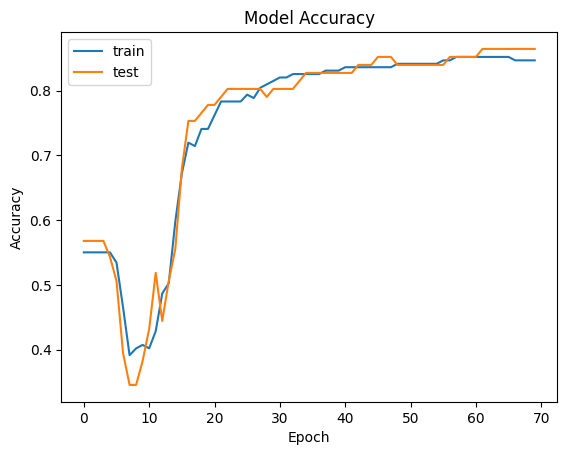

In [186]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

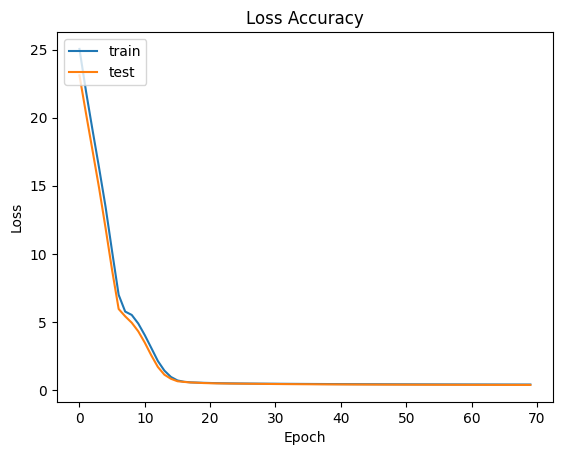

In [187]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()